## Importing Libraries

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## Loading Fashion-MNIST Dataset

In [3]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = False,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = False,
    transform = ToTensor()
)

## Visulaizing the Dataset

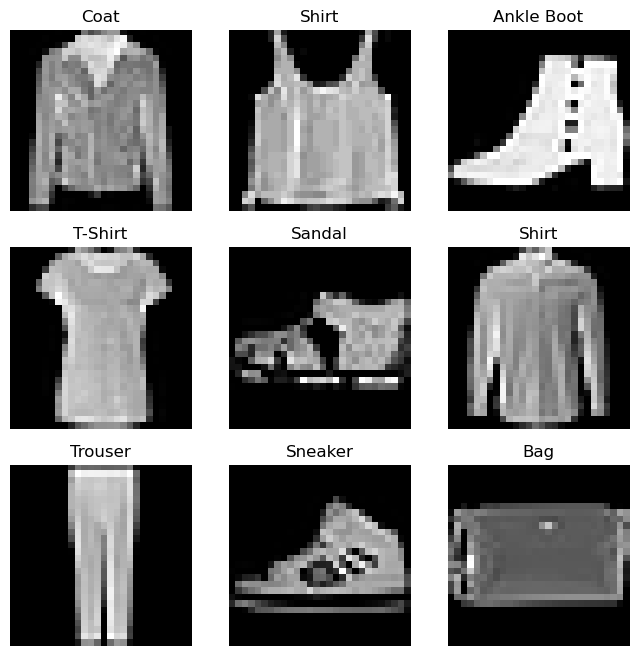

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize = (8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):

    # taking a random index in the range 0 to length of training_data
    sample_idx = torch.randint(len(training_data), size = (1,)).item()

    # training_data[i] returns image and the labelof the image.
    img, label = training_data[sample_idx]          

    # Visualizing the images
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

## Randomly splitting train and validation set

In [11]:
from torch.utils.data import random_split


train_size = len(training_data)
val_size = int(0.1 * train_size) # 10% of the training set for validation

training_data, val_data = random_split(training_data, [train_size - val_size, val_size])

## Creating a DataLoader

In [12]:
batch_size = 64

# DataLoader
train_dataloader = DataLoader(training_data, batch_size = batch_size)
val_dataloader = DataLoader(val_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

## Defining a Class

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Optimizing the Model Parameteres

In [7]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr = 1e-3)

## Train Function

In [8]:
def train(dataloader, model, loss_func, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):

        # Computing the prediction error
        pred = model(X)
        loss = loss_func(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

## Test Function

In [9]:
def test(dataloader, model, loss_func):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_func(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

## Model Traning and testing

In [10]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_func, optimizer)
    test(test_dataloader, model, loss_func)
print("Done!")

Epoch 1
-------------------------------


loss: 2.298359  [   64/60000]
loss: 0.562574  [ 6464/60000]
loss: 0.395932  [12864/60000]
loss: 0.508449  [19264/60000]
loss: 0.461466  [25664/60000]
loss: 0.431164  [32064/60000]
loss: 0.378634  [38464/60000]
loss: 0.545493  [44864/60000]
loss: 0.465049  [51264/60000]
loss: 0.510431  [57664/60000]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.413539 

Epoch 2
-------------------------------
loss: 0.256497  [   64/60000]
loss: 0.351983  [ 6464/60000]
loss: 0.266296  [12864/60000]
loss: 0.398182  [19264/60000]
loss: 0.411567  [25664/60000]
loss: 0.379900  [32064/60000]
loss: 0.310065  [38464/60000]
loss: 0.497211  [44864/60000]
loss: 0.388081  [51264/60000]
loss: 0.433293  [57664/60000]
Test Error: 
 Accuracy: 85.2%, Avg loss: 0.396641 

Epoch 3
-------------------------------
loss: 0.227376  [   64/60000]
loss: 0.343132  [ 6464/60000]
loss: 0.219392  [12864/60000]
loss: 0.321019  [19264/60000]
loss: 0.370215  [25664/60000]
loss: 0.357347  [32064/60000]
loss: 0.278402  [38464/60000]
loss: 